# Đề thi thử thực hành Học máy ứng dụng

- Các bạn có thời gian làm bài là 2.5h
- Chỉ được sử dụng tài liệu có sẵn và không được sử dụng những tài liệu tham khảo là AI(ChatGPT, Gemini,...)
- Cố gắng làm hết khả năng của mình nha :)

# Câu 1: 3 Điểm

Chúng ta đã biết công thức tính khoảng cách Euclidean như sau:

$$
d(\mathbf{x}, \mathbf{y}) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
$$

Trong đó:

$$
\mathbf{x} = [x_1, x_2, \dots, x_n] \quad \text{và} \quad \mathbf{y} = [y_1, y_2, \dots, y_n]
$$

là hai điểm trong không gian \(n\)-chiều.

Yêu cầu:
Viết hàm hàm tính khoảng cách Euclidean khi biết x = [1, 2, 3] và y = [4, 5, 6]


In [121]:
import math

def euclidean_distance(x, y):
    distance = math.sqrt(sum((a - b) ** 2 for a, b in zip(x, y)))
    return distance

x = (1, 2, 3)
y = (4, 5, 6)

print(euclidean_distance(x, y))

5.196152422706632


# Câu 2: 5 Điểm

Cho tập dữ liệu hoa Iris

In [122]:
from sklearn.datasets import load_iris
from cvxopt import matrix, solvers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [123]:
# Load data
iris = load_iris()
X = iris.data[:200, :2]  # First 200 samples, first 2 features
y = iris.target[:200]     # First 200 labels
y = np.where(y == 0, -1, 1)  # Convert labels to {-1, 1}

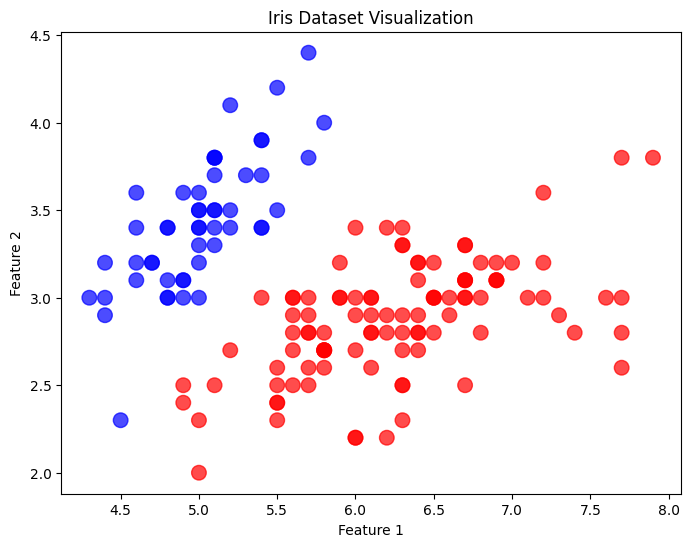

In [124]:
# Trực quan hóa dữ liệu

plt.figure(figsize=(8, 6))
colors = ['red' if label == 1 else 'blue' for label in y]
plt.scatter(X[:, 0], X[:, 1], s=110, c=colors, alpha=0.7)
plt.title('Iris Dataset Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


Kết quả tham khảo:

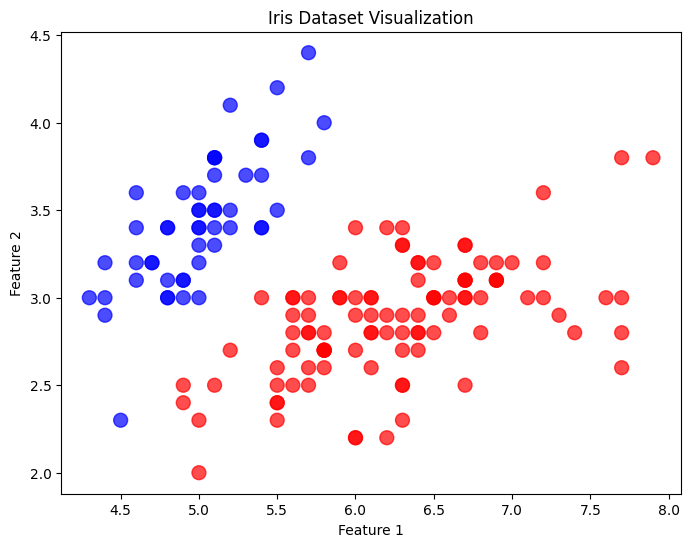

In [125]:
# Chuẩn hóa dữ liệu:
scaler = StandardScaler()
X = scaler.fit_transform(X)

     pcost       dcost       gap    pres   dres
 0: -2.8604e+01 -6.3735e+01  7e+02  3e+01  2e+00
 1: -5.2808e+01 -6.3087e+01  4e+02  1e+01  1e+00
 2: -1.0636e+02 -8.0020e+01  3e+02  8e+00  7e-01
 3: -2.1200e+02 -1.5055e+02  3e+02  8e+00  7e-01
 4: -1.2180e+02 -7.2427e+01  3e+02  5e+00  4e-01
 5: -6.1694e+01 -3.7691e+01  7e+01  1e+00  8e-02
 6: -3.1586e+01 -3.0968e+01  7e+00  9e-02  7e-03
 7: -2.9826e+01 -2.9846e+01  9e-02  8e-04  6e-05
 8: -2.9835e+01 -2.9835e+01  9e-04  8e-06  6e-07
 9: -2.9835e+01 -2.9835e+01  9e-06  8e-08  6e-09
10: -2.9835e+01 -2.9835e+01  9e-08  8e-10  6e-11
11: -2.9835e+01 -2.9835e+01  9e-10  8e-12  6e-13
Optimal solution found.

Lambda = [ 0.     0.     0.     0.     0.     0.    -0.     0.     0.     0.
  0.     0.     0.    -0.     0.     0.     0.     0.     0.    -0.
  0.     0.    -0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.    -0.     0.     0.     0.     6.096 -0.     0.     0.
  0.    23.739 -0.     0.    -0.     0.    -0.     0.     

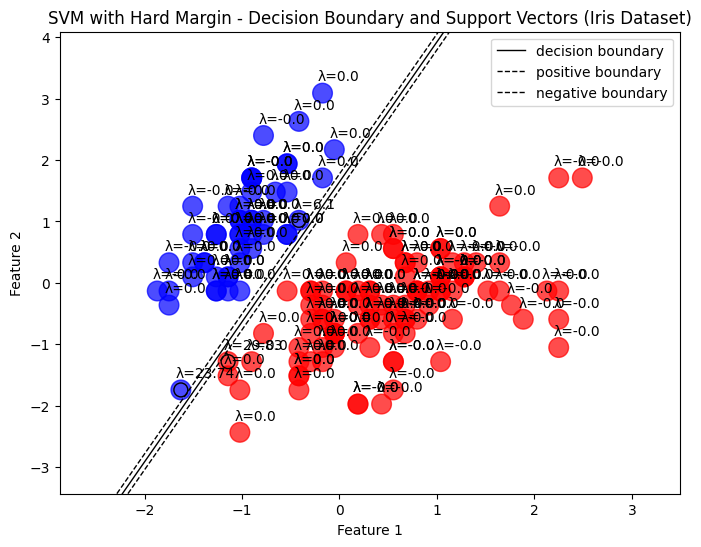


Margin = 0.2589


In [126]:
# ---- Compute lambda using cvxopt ----

# Compute the H matrix for the optimization problem
n_samples, n_features = X.shape
H = np.zeros((n_samples, n_samples))
for i in range(n_samples):
    for j in range(n_samples):
        H[i, j] = y[i] * y[j] * np.dot(X[i], X[j])
P = matrix(H)
q = matrix(-1 * np.ones(n_samples))
G = matrix(-np.eye(n_samples))
h = matrix(np.zeros(n_samples))
A = matrix(y, (1, n_samples), tc='d')
b = matrix(0.0)
# Set solver parameters
solvers.options['abstol'] = 1e-10
solvers.options['reltol'] = 1e-10
solvers.options['feastol'] = 1e-10

# Solve QP
solution = solvers.qp(P, q, G, h, A, b)
lamb = np.array(solution['x'])  # lambda

# ---- Compute w and b ----

# Weight vector w
w = np.sum(lamb * y[:, None] * X, axis=0)

# Identify support vectors
support_vector_indices = np.where(lamb > 1e-5)[0]
support_vectors = X[support_vector_indices]
support_vector_labels = y[support_vector_indices]
support_vector_lambdas = lamb[support_vector_indices]

# Bias b
b = np.mean(support_vector_labels - np.dot(support_vectors, w))

# Print results
print('\nLambda =', np.round(lamb.flatten(), 3))
print('w =', np.round(w, 3))
print('b =', np.round(b, 3))

# ---- Visualization ----

plt.figure(figsize=(8, 6))
colors = ['red' if label == 1 else 'blue' for label in y]
plt.scatter(X[:, 0], X[:, 1], s=200, c=colors, alpha=0.7)

# Plot decision boundary
x1_dec = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
x2_dec = -(w[0] * x1_dec + b) / w[1]
plt.plot(x1_dec, x2_dec, 'k-', lw=1.0, label='decision boundary')

# Plot positive and negative margins
w_norm = np.linalg.norm(w)
w_unit = w / w_norm
half_margin = 1 / w_norm
upper = np.array([x1_dec, x2_dec + half_margin]).T
lower = np.array([x1_dec, x2_dec - half_margin]).T

plt.plot(upper[:, 0], upper[:, 1], 'k--', lw=1.0, label='positive boundary')
plt.plot(lower[:, 0], lower[:, 1], 'k--', lw=1.0, label='negative boundary')

# Highlight support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, marker='o', facecolors='none', edgecolors='k')

# Annotate lambda for each data point
for s, (x1, x2) in zip(lamb, X):
    plt.annotate('λ=' + str(s[0].round(2)), (x1 - 0.05, x2 + 0.2))

plt.legend()
plt.title("SVM with Hard Margin - Decision Boundary and Support Vectors (Iris Dataset)")
plt.xlim(X[:, 0].min()-1, X[:, 0].max()+1)
plt.ylim(X[:, 1].min()-1, X[:, 1].max()+1)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

print("\nMargin = {:.4f}".format(2 * half_margin))


Kết quả tham khảo:

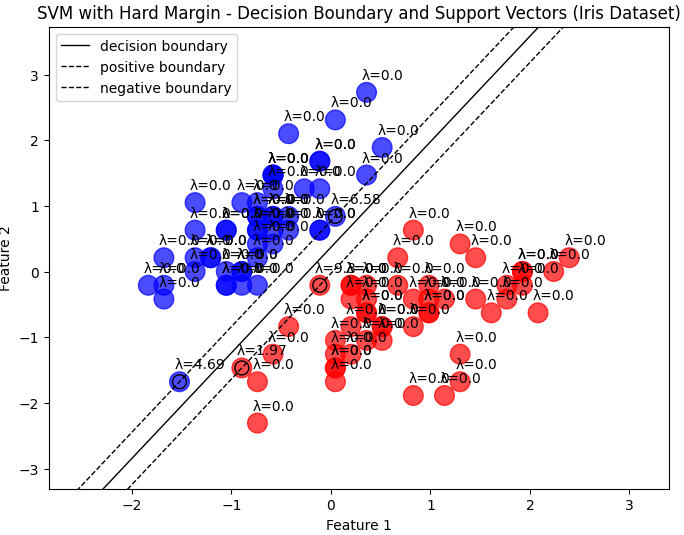

# Câu 3: 2 Điểm

## Công Thức Tính Gini Impurity trong cây quyết định

Gini Impurity là một thước đo độ hỗn loạn của một tập dữ liệu. Công thức tính Gini Impurity cho một tập dữ liệu \( S \) là:

$$ Gini(S) = 1 - \sum_{i=1}^{c} p_i^2 $$

Trong đó:
- \( c \) là số lượng lớp (classes).
- \( p_i \) là xác suất của lớp \( i \) trong tập dữ liệu \( S \).

Xác định lỗi sai của đoạn code bên dưới và sửa lại cho đúng

In [127]:
# Đọc đoạn code này
import numpy as np

def gini_impurity(y):
    unique_classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)  
    return 1 - np.sum(probabilities ** 2)  

y = np.array([0, 1, 0, 1, 1, 0, 0, 1])
gini = gini_impurity(y)
print("Gini Impurity của tập dữ liệu là:", gini)


Gini Impurity của tập dữ liệu là: 0.5


### Đoạn code trên đúng hay sai? Nếu sai thì sửa lại như thế nào cho đúng ?

In [128]:
# Trả lời câu hỏi trên ở đây

##### unique_classes, counts = np.unique(y, return_counts=False) => return_counts=True 
#   probabilities = counts / len(y) => probabilities = counts / len(Y)
# return 1 - np.sum(probabilities) => return 1 - np.sum(probabilities ** 2)